# 1. Cleaning data

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/workspaces/python-for-finance-jume8jume7/data/DASH_A1.csv")

In [3]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)

In [4]:
#Clean data
# Getting rid of duplicates
df.drop_duplicates(inplace=True)

# Counting duplicates
print(df.duplicated().sum())

df['Close'] = df['Close'].ffill()
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df['Month'] = df['Date'].dt.month
monthly_high_mean = df.groupby('Month')['High'].transform('mean')
df['High'] = df['High'].fillna(monthly_high_mean)
monthly_low_mean = df.groupby('Month')['Low'].transform('mean')
df['Low'] = df['Low'].fillna(monthly_low_mean)
df.drop('Month', axis=1, inplace=True)
df.isnull().sum()

0


Date       0
Close      0
High       0
Low        0
Open       0
Volume    26
dtype: int64

In [5]:
# Identify missing volume rows
missing_volume = df['Volume'].isna()
# Rule 4: Close == Open -> fill missing Volume with 0
zero_vol_mask = missing_volume & (df['Close'] == df['Open'])
df.loc[zero_vol_mask, 'Volume'] = 0

# Rule 5: Close != Open -> fill missing Volume with median of existing volumes
non_zero_vol_mask = missing_volume & (df['Close'] != df['Open'])
volume_median = df['Volume'].median()
df.loc[non_zero_vol_mask, 'Volume'] = volume_median

In [6]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [7]:
df.to_csv('cleaned_data.csv')

## 2. Feature engineering

In [8]:
import pandas as pd
#Set date as index
df.set_index('Date', inplace=True)

# 1. Simple Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# 2. Logarithmic Returns
df["PrevClose"] = df["Close"].shift(1)
df['LogReturn'] = np.log(df['Close'] / df["PrevClose"])

# 3. 20-Day Momentum
df['20D_Momentum'] = df['Close'] - df['Close'].shift(20)

# 4. 20-Day Simple Moving Average (SMA)
df['20D_SMA'] = df['Close'].rolling(window=20).mean()

# 5. 20-Day Rolling Volatility
df['20D_Volatility'] = df['Daily_Return'].rolling(window=20).std()

# 6. Day of the Week
df['Day_of_the_week'] = df.index.strftime('%a')

# 7. Price Surge Identification
mean_return = df["Daily_Return"].mean()
std_return = df["Daily_Return"].std()
return_threshold = mean_return + (4 * std_return)

condition = df["Daily_Return"] > return_threshold

df["Price_Surge"] = condition

# 8. Volume Spike Identification
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
volume_threshold = mean_volume + (6 * std_volume)

condition = df["Volume"] > volume_threshold

df["Volume_Spike"] = condition

# 9. Bollinger Bands (20-day SMA ± 2 std)
df['Dev'] = df['Close'].rolling(window=20).std()
df['BB_High'] = df['20D_SMA'] + 2 * df['Dev']
df['BB_Low'] = df['20D_SMA'] - 2 * df['Dev']


In [9]:
pd.set_option('display.max_rows', None)
df

,Close,High,Low,Open,Volume,Daily_Return,PrevClose,LogReturn,20D_Momentum,20D_SMA,20D_Volatility,Day_of_the_week,Price_Surge,Volume_Spike,Dev,BB_High,BB_Low
Date,,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wed,False,False,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thu,False,False,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Fri,False,False,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Mon,False,False,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tue,False,False,NaN,NaN,NaN
2020-12-16,158.050003,167.470001,157.199997,161.179993,3061300.0,-0.005287,158.889999,-0.005301,NaN,NaN,NaN,Wed,False,False,NaN,NaN,NaN
2020-12-17,154.210007,161.660004,123.895364,159.100006,6369800.0,-0.024296,158.050003,-0.024596,NaN,NaN,NaN,Thu,False,False,NaN,NaN,NaN
2020-12-18,166.350006,169.949997,147.320007,154.210007,8157800.0,0.078724,154.210007,0.075779,NaN,NaN,NaN,Fri,False,False,NaN,NaN,NaN
2020-12-21,160.229996,173.460007,155.000000,169.070007,3884200.0,-0.036790,166.350006,-0.037484,NaN,NaN,NaN,Mon,False,False,NaN,NaN,NaN


## 3. Key Dates

In [10]:
df['Year'] = df.index.year

df['Rolling Volatility'] = df['Daily_Return'].rolling(window=20).std()

df.groupby('Year').agg(
    HighestVolatilityDate=('Rolling Volatility', 'idxmax'),
    HighestVolatility=('Rolling Volatility', 'max'),
    LargestPriceSurgeDate=('Daily_Return', 'idxmax'),
    LargestPriceSurge=('Daily_Return', 'max'),
    LargestPriceDropDate=('Daily_Return', 'idxmin'),
    LargestPriceDrop=('Daily_Return', 'min'),
    HighestVolumeDate=('Volume', 'idxmax'),
    HighestVolume=('Volume', 'max'),
    HighestHighDate=('High', 'idxmax'),
    HighestHigh=('High', 'max'),
    LowestLowDate=('Low', 'idxmin'),
    LowestLow=('Low', 'min'),
    AnnualOpen=('Open', 'first'),
    AnnualClose=('Close', 'last')
)

,HighestVolatilityDate,HighestVolatility,LargestPriceSurgeDate,LargestPriceSurge,LargestPriceDropDate,LargestPriceDrop,HighestVolumeDate,HighestVolume,HighestHighDate,HighestHigh,LowestLowDate,LowestLow,AnnualOpen,AnnualClose
Year,,,,,,,,,,,,,,
2020,NaT,NaN,2020-12-18,0.078724,2020-12-14,-0.085714,2020-12-09,25373700.0,2020-12-09,195.500000,2020-12-17,123.895364,182.000000,142.750000
2021,2021-05-20,0.067393,2021-05-14,0.221491,2021-02-22,-0.135457,2021-03-09,20400000.0,2021-11-15,257.250000,2021-05-13,110.129997,142.500000,148.899994
2022,2022-06-01,0.080994,2022-03-16,0.134512,2022-05-11,-0.131621,2022-02-17,47405700.0,2022-01-12,152.494995,2022-10-24,41.365002,149.610001,48.820000
2023,2023-11-06,0.047470,2023-11-02,0.156653,2023-02-17,-0.075946,2023-12-15,30556000.0,2023-02-06,137.806758,2023-01-06,45.931999,49.980000,98.889999
2024,2024-02-27,0.033547,2024-08-02,0.083457,2024-05-02,-0.103170,2024-05-02,22134800.0,2024-12-17,181.779999,2024-01-04,93.330002,97.800003,167.750000
2025,2025-04-10,0.048324,2025-04-09,0.137738,2025-04-03,-0.080634,2025-03-21,73637400.0,2025-06-06,220.880005,2025-05-01,111.925752,168.789993,218.119995


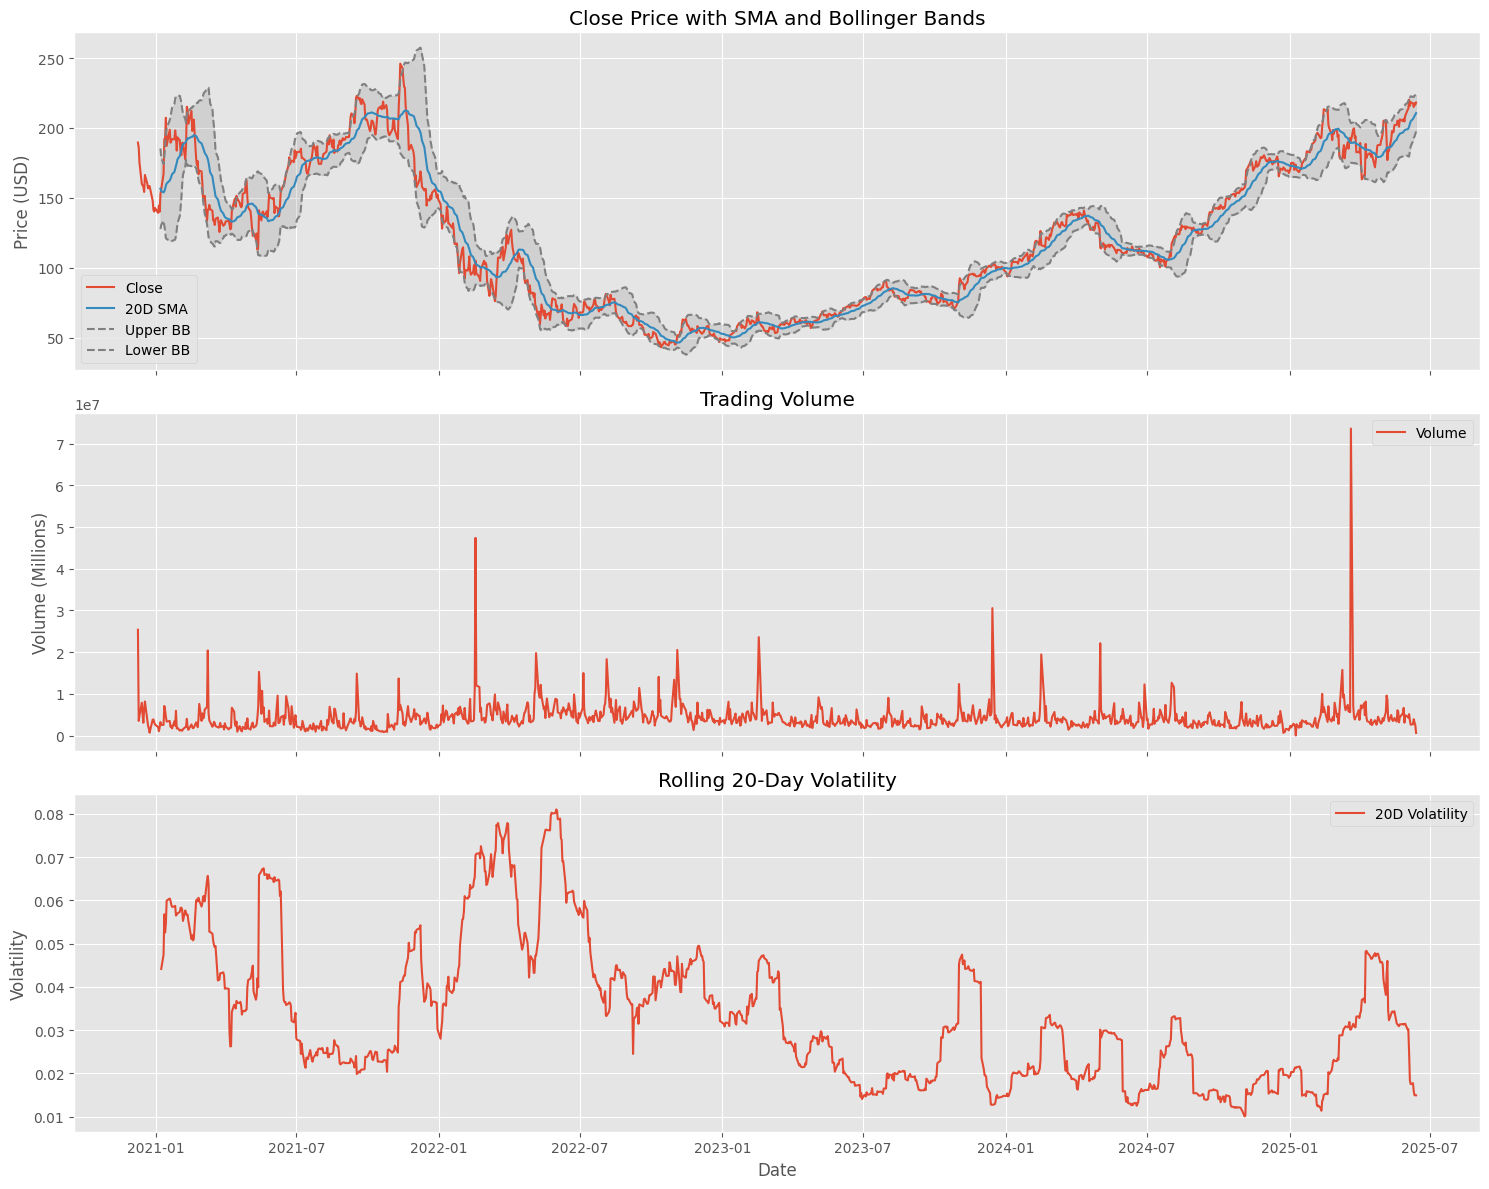

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# 1. Close with SMA and Bollinger Bands
ax1.plot(df.index, df['Close'], label='Close')
ax1.plot(df.index, df['20D_SMA'], label='20D SMA')
ax1.plot(df.index, df['BB_High'], linestyle='--', color='grey', label='Upper BB')
ax1.plot(df.index, df['BB_Low'], linestyle='--', color='grey', label='Lower BB')
ax1.fill_between(df.index, df['BB_High'], df['BB_Low'], color='grey', alpha=0.2)
ax1.set_title('Close Price with SMA and Bollinger Bands')
ax1.set_ylabel('Price (USD)')
ax1.legend()

# 2. Volume
ax2.plot(df.index, df['Volume'], label='Volume')
ax2.set_title('Trading Volume')
ax2.set_ylabel('Volume (Millions)')
ax2.legend()

# 3. Rolling Volatility
ax3.plot(df.index, df['20D_Volatility'], label='20D Volatility')
ax3.set_title('Rolling 20-Day Volatility')
ax3.set_ylabel('Volatility')
ax3.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

